In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from tabulate import tabulate
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("RAWdataforEdinburghMasters1.csv")

In [3]:
#dont need first two columns
data = data.drop(columns=data.columns[:2], axis=1)

data

#11216 datapoints

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
0,Container,24.0,0-36,25.0,2,56.0,31-60%,13.51,0,o
1,Bulk Carrier,30.0,0-36,42.0,4,64.7,61-100%,17.84,0,o
2,Products Tanker,30.0,0-36,22.0,6,52.3,31-60%,48.75,0,o
3,Deck Cargo Ship,35.0,0-36,28.0,7,39.1,31-60%,37.64,0,o
4,Wood Chips Carrier,35.0,0-36,31.0,1,60.2,61-100%,21.91,0,o
...,...,...,...,...,...,...,...,...,...,...
11211,Bulk Carrier,60.0,37-60,35.0,1,25.2,0-30%,0.01,1,f
11212,Bulker,30.0,0-36,27.0,5,65.0,61-100%,9.62,1,f
11213,Products Tanker,24.0,0-36,22.0,6,61.2,61-100%,22.44,0,f
11214,Ro-Ro,60.0,37-60,32.0,7,12.0,0-30%,14.33,0,f


In [4]:
## pre-processing

#if there are some problematic datapoints

display(data[(data["Scheme Group"]=="0-36") & (data["Scheme"] > 36)])

display(data[(data["Scheme Group"]=="37-60") & (data["Scheme"] < 37)])

display(data[(data["Scheme Group"]=="37-60") & (data["Scheme"] > 60)])


,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code


,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code


,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
5316,Vehicles Carrier,67.0,37-60,24.0,5,58.9,31-60%,8.52,1,m
5433,Combination Gas Tanker (LNG/LPG),90.0,37-60,46.0,4,70.2,61-100%,13.25,0,m


In [5]:
# delete these two problematic datapoints where their "scheme Group" does not match their "Scheme"
data = data.drop(index=[5316, 5433])

In [6]:
##the number of data after removing those two datapoints
len(data)

11214

In [7]:
##if there are any NAs in each columns
data.isna().any()

Vessel Group           True
Scheme                 True
Scheme Group          False
In Service Period      True
Route Number          False
% Activity             True
Activity Group         True
Performance Metric    False
Pass/Fail             False
Product Code          False
dtype: bool

In [8]:
#delete any rows which contain NAs
data = data.dropna(axis=0)
data

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
0,Container,24.0,0-36,25.0,2,56.0,31-60%,13.51,0,o
1,Bulk Carrier,30.0,0-36,42.0,4,64.7,61-100%,17.84,0,o
2,Products Tanker,30.0,0-36,22.0,6,52.3,31-60%,48.75,0,o
3,Deck Cargo Ship,35.0,0-36,28.0,7,39.1,31-60%,37.64,0,o
4,Wood Chips Carrier,35.0,0-36,31.0,1,60.2,61-100%,21.91,0,o
...,...,...,...,...,...,...,...,...,...,...
11211,Bulk Carrier,60.0,37-60,35.0,1,25.2,0-30%,0.01,1,f
11212,Bulker,30.0,0-36,27.0,5,65.0,61-100%,9.62,1,f
11213,Products Tanker,24.0,0-36,22.0,6,61.2,61-100%,22.44,0,f
11214,Ro-Ro,60.0,37-60,32.0,7,12.0,0-30%,14.33,0,f


After deleting rows containing NA values, the number of data is reduced to 11208 from 11214. 

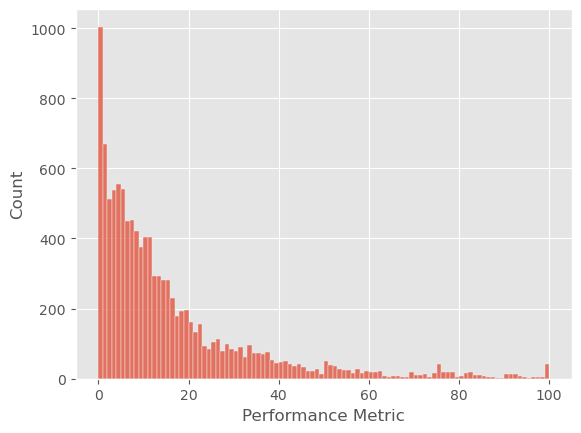

In [9]:
sns.histplot(data["Performance Metric"], bins=100)
plt.show()

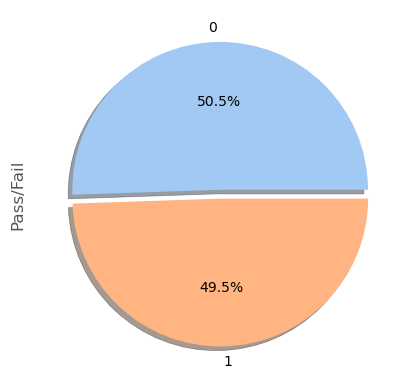

In [10]:
#draw a pie plot of the pass rate
colors = sns.color_palette('pastel')
data["Pass/Fail"].value_counts().plot.pie(colors = colors, explode = [0.03,0.03],autopct='%1.1f%%', shadow = 'True')
plt.show()

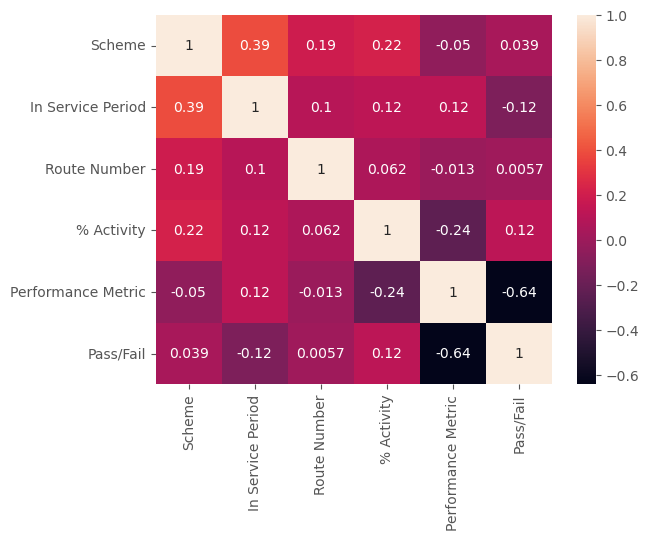

In [11]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
##only consider those data belonging to "Schemem Group": 37-60% 
data1 = data[data["Scheme Group"]=="37-60"]

#data = data[data["In Service Period"]==60]

In [13]:
data1.isna().any()

Vessel Group          False
Scheme                False
Scheme Group          False
In Service Period     False
Route Number          False
% Activity            False
Activity Group        False
Performance Metric    False
Pass/Fail             False
Product Code          False
dtype: bool

In [14]:
#number of all types of vessels
data1.value_counts("Vessel Group")

Vessel Group
Container                                  408
Bulker                                     296
Offshore Vessel                            217
Tanker                                     201
Chemical Tanker                            174
General Cargo                              130
Tug                                        122
LNG Carrier                                118
Bulk Carrier                               107
Ro-Ro                                       88
Container Ship (Fully Cellular)             70
Vehicle Carrier                             63
Platform Supply Ship                        60
Product Tanker                              42
LNG Tanker                                  33
General Cargo Ship                          30
Chemical/Products Tanker                    28
Passenger/Ro-Ro Ship (Vehicles)             23
Crude Oil Tanker                            23
LPG Carrier                                 23
Anchor Handling Tug Supply                  21


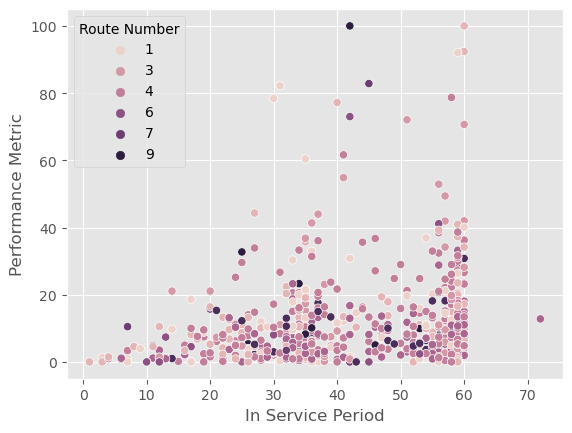

In [15]:
sns.scatterplot(x="In Service Period", y="Performance Metric", data=data1[data1["Product Code"]=="a"], hue="Route Number")
plt.show()

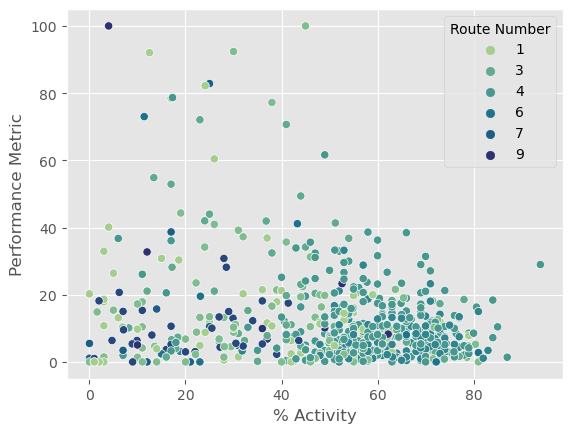

In [16]:
sns.scatterplot(x="% Activity", y="Performance Metric", data=data1[data1["Product Code"]=="a"], hue="Route Number", 
               palette="crest")
plt.show()

In [17]:
#classify the (scheme group-37-60) data into 3 subsets by the activity group
act0_30 = data1[data1["Activity Group"]=="0-30%"]
act31_60 = data1[data1["Activity Group"]=="31-60%"]
act61_100 = data1[data1["Activity Group"]=="61-100%"]

In [18]:
act0_30

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
11142,Offshore Vessel,60.0,37-60,25.0,4,20.0,0-30%,17.56,0,f
11173,Anchor Handling Tug Supply,48.0,37-60,1.0,7,5.0,0-30%,2.73,1,f
11206,Anchor Handling Tug Supply,60.0,37-60,52.0,4,23.8,0-30%,5.93,1,f
11211,Bulk Carrier,60.0,37-60,35.0,1,25.2,0-30%,0.01,1,f


In [19]:
act31_60

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
16,Bulk Carrier,60.0,37-60,41.0,4,52.3,31-60%,9.07,1,o
42,Products Tanker,47.0,37-60,29.0,2,49.6,31-60%,15.23,0,o
70,Bulk Carrier,60.0,37-60,19.0,6,35.7,31-60%,0.15,1,o
90,Container Ship (Fully Cellular),59.0,37-60,59.0,2,51.1,31-60%,31.35,0,o
99,Bulk Carrier,59.0,37-60,37.0,4,50.5,31-60%,7.91,1,o
...,...,...,...,...,...,...,...,...,...,...
11179,Platform Supply Ship,60.0,37-60,57.0,3,36.8,31-60%,41.93,0,f
11185,General Cargo,60.0,37-60,24.0,4,40.0,31-60%,0.33,1,f
11188,Bulker,40.0,37-60,38.0,1,43.0,31-60%,5.08,1,f
11208,Bulker,60.0,37-60,59.0,2,36.0,31-60%,26.59,0,f


In [20]:
act61_100

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
7,General Cargo Ship,60.0,37-60,29.0,4,60.1,61-100%,3.22,1,o
8,Container,60.0,37-60,10.0,1,69.0,61-100%,6.30,1,o
30,Container Ship (Fully Cellular),60.0,37-60,58.0,5,75.3,61-100%,13.16,0,o
56,Container Ship (Fully Cellular),60.0,37-60,12.0,4,71.5,61-100%,0.84,1,o
59,Deck Cargo Ship,38.0,37-60,35.0,1,78.9,61-100%,5.23,1,o
...,...,...,...,...,...,...,...,...,...,...
11016,Container Ship (Fully Cellular),60.0,37-60,36.0,1,61.0,61-100%,10.07,0,f
11100,Bulk Carrier,60.0,37-60,53.0,4,68.3,61-100%,3.14,1,f
11141,Bulk Carrier,60.0,37-60,52.0,5,60.7,61-100%,37.56,0,f
11154,Chemical/Products Tanker,60.0,37-60,34.0,4,63.3,61-100%,7.36,1,f


In [21]:
target_products = ["a", "f", "g", "i", "k", "m", "n", "o", "q", "r", "s"] #target products

In [22]:
data1[data1["Product Code"].isin(target_products)]

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
7,General Cargo Ship,60.0,37-60,29.0,4,60.1,61-100%,3.22,1,o
8,Container,60.0,37-60,10.0,1,69.0,61-100%,6.30,1,o
16,Bulk Carrier,60.0,37-60,41.0,4,52.3,31-60%,9.07,1,o
30,Container Ship (Fully Cellular),60.0,37-60,58.0,5,75.3,61-100%,13.16,0,o
42,Products Tanker,47.0,37-60,29.0,2,49.6,31-60%,15.23,0,o
...,...,...,...,...,...,...,...,...,...,...
11206,Anchor Handling Tug Supply,60.0,37-60,52.0,4,23.8,0-30%,5.93,1,f
11208,Bulker,60.0,37-60,59.0,2,36.0,31-60%,26.59,0,f
11211,Bulk Carrier,60.0,37-60,35.0,1,25.2,0-30%,0.01,1,f
11214,Ro-Ro,60.0,37-60,32.0,7,12.0,0-30%,14.33,0,f


In [23]:
products = data1["Product Code"].unique()

In [24]:
#highlight those numbers < 10 with different colours
def highlight(cell):
    '''
    This function takes as input all entry in a dataframe and changes the colour of the number 
    if it's less than 10.
    '''
    if type(cell) != str and cell == 0:
        return "color: red" #if it's 0, mark it as bright red
    elif type(cell) != str and cell < 10:
        return "color: darkred" #if it's below 10, mark it as dark red
    else:
        return "color: black"
    

In [25]:
def get_table(df):
    '''
    This function helps derive a table of the numbers of vessels for different products and different routes.
    It takes as input a data frame.
    '''
    products = ["a", "f", "g", "i", "k", "m", "n", "o", "q", "r", "s"] #target products
    #build a matrix consisting of zeros; rows=products; columns=routes
    table_product_route = np.zeros((len(products), 9))
    
    #fix product type
    for i, product in enumerate(products):
        df_product = df[df["Product Code"]==product] 
        #fix route number
        for j in range(9):
            table_product_route[i, j] = len(df_product[df_product["Route Number"]==j+1])
            
    #make it a data frame
    table = pd.DataFrame(data=table_product_route, columns=range(1,10,1), index=products)
    table.index.name = "Products"
    table.columns.name = "Routes"
    
    return table.astype(int).style.applymap(highlight)
    

In [26]:
#table of the numbers of vessels from group "Activity Group": 0-30%
table1 = get_table(df=act0_30)
display(table1)

#table of the numbers of vessels from group "Activity Group": 31-60%
table2 = get_table(df=act31_60)
display(table2)

#table of the numbers of vessels from group "Activity Group": 61-100%
table3 = get_table(df=act61_100)
display(table3)


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,31,36,13,9,1,4,9,23,3
f,32,13,2,6,1,4,13,3,2
g,52,31,12,22,0,4,5,12,5
i,0,0,0,0,0,0,1,0,0
k,8,3,3,8,0,0,5,0,0
m,2,1,1,0,0,0,1,0,0
n,0,0,1,0,0,0,5,0,0
o,6,2,0,0,0,0,0,1,0
q,2,0,0,0,0,0,0,0,0


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,30,37,30,118,39,4,1,11,5
f,29,27,12,38,10,1,2,6,0
g,4,4,7,8,6,1,0,1,0
i,0,2,0,0,0,0,0,0,0
k,7,21,11,10,2,1,1,1,1
m,2,4,6,17,3,1,0,0,0
n,3,0,1,3,1,3,3,1,0
o,7,8,0,19,2,1,0,0,0
q,1,1,0,2,0,1,1,1,0


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,13,13,12,120,78,6,0,0,1
f,9,4,2,28,11,0,0,0,0
g,1,0,3,4,8,6,0,0,0
i,4,1,0,9,0,4,0,0,0
k,10,19,4,49,19,20,0,4,1
m,0,0,1,40,5,2,0,0,0
n,0,0,0,15,10,0,0,0,0
o,2,1,0,14,5,0,0,0,0
q,7,0,1,12,4,0,0,0,0


# activity rule


In [27]:
##extrapolate by activity

for product in products:
    product0_30 = act0_30[act0_30["Product Code"]==product] 
    product31_60 = act31_60[act31_60["Product Code"]==product]
    product61_100 = act61_100[act61_100["Product Code"]==product]
    
    #fix route number
    for j in range(9):
        route0_30 = product0_30[product0_30["Route Number"]==j+1]        
        route31_60 = product31_60[product31_60["Route Number"]==j+1]
        route61_100 = product61_100[product61_100["Route Number"]==j+1]
        
        #consider those metric <=10 as good results
        good0_30 = route0_30[route0_30["Performance Metric"]<=10]
        good31_60 = route31_60[route31_60["Performance Metric"]<=10]
        
        if len(route61_100)==0:
            act61_100 = pd.concat([good31_60, act61_100])
        if len(route31_60)==0:
            act31_60 = pd.concat([good0_30, act31_60])



In [28]:
a = pd.concat([act0_30, act31_60, act61_100])
a

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
11016,Container Ship (Fully Cellular),60.0,37-60,36.0,1,61.0,61-100%,10.07,0,f
11100,Bulk Carrier,60.0,37-60,53.0,4,68.3,61-100%,3.14,1,f
11141,Bulk Carrier,60.0,37-60,52.0,5,60.7,61-100%,37.56,0,f
11154,Chemical/Products Tanker,60.0,37-60,34.0,4,63.3,61-100%,7.36,1,f


In [29]:
a[a["Product Code"].isin(target_products)]

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
11016,Container Ship (Fully Cellular),60.0,37-60,36.0,1,61.0,61-100%,10.07,0,f
11100,Bulk Carrier,60.0,37-60,53.0,4,68.3,61-100%,3.14,1,f
11141,Bulk Carrier,60.0,37-60,52.0,5,60.7,61-100%,37.56,0,f
11154,Chemical/Products Tanker,60.0,37-60,34.0,4,63.3,61-100%,7.36,1,f


Show the three tables after extrapolation by activity group.

In [30]:
act_group = [act0_30, act31_60, act61_100]

#
groups = ["Activity Group 0-30%", "Activity Group 31-60%", "Activity Group 61-100%"]

#dervie the table of numbers after extrapolation by activity
for i, group in enumerate(act_group):
    print(groups[i])
    display(get_table(df=group))
    print("\n\n\n")

Activity Group 0-30%


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,31,36,13,9,1,4,9,23,3
f,32,13,2,6,1,4,13,3,2
g,52,31,12,22,0,4,5,12,5
i,0,0,0,0,0,0,1,0,0
k,8,3,3,8,0,0,5,0,0
m,2,1,1,0,0,0,1,0,0
n,0,0,1,0,0,0,5,0,0
o,6,2,0,0,0,0,0,1,0
q,2,0,0,0,0,0,0,0,0






Activity Group 31-60%


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,30,37,30,118,39,4,1,11,5
f,29,27,12,38,10,1,2,6,2
g,4,4,7,8,6,1,2,1,2
i,0,2,0,0,0,0,0,0,0
k,7,21,11,10,2,1,1,1,1
m,2,4,6,17,3,1,0,0,0
n,3,0,1,3,1,3,3,1,0
o,7,8,0,19,2,1,0,0,0
q,1,1,0,2,0,1,1,1,0






Activity Group 61-100%


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,13,13,12,120,78,6,1,8,1
f,9,4,2,28,11,1,0,4,0
g,1,1,3,4,8,6,0,0,0
i,4,1,0,9,0,4,0,0,0
k,10,19,4,49,19,20,0,4,1
m,1,1,1,40,5,2,0,0,0
n,3,0,1,15,10,3,1,0,0
o,2,1,0,14,5,1,0,0,0
q,7,0,1,12,4,0,0,0,0


# By time 
For those target data missing in Scheme Group 37-60, we are using the existing data in Scheme Group 0-36 for extrapolation.

In [31]:
#the data we will use after is from "Scheme Group" = 0-36 
data2 = data[data["Scheme Group"]=="0-36"]
act0_30_2 = data2[data2["Activity Group"]=="0-30%"]
act31_60_2 = data2[data2["Activity Group"]=="31-60%"]
act61_100_2 = data2[data2["Activity Group"]=="61-100%"]
act_group2 = [act0_30_2, act31_60_2, act61_100_2]

#by time
for route in range(1, 10): #and for each route 
    for product in products: #and for each product
        #for the target product in each route and in each activity group
        target0_30 = act0_30[(act0_30["Route Number"]==route)&(act0_30["Product Code"]==product)]
        target31_60 = act31_60[(act31_60["Route Number"]==route)&(act31_60["Product Code"]==product)]
        target61_100 = act61_100[(act61_100["Route Number"]==route)&(act61_100["Product Code"]==product)]
        
        if len(target0_30) < 10: #if there's not enough data 
            #extract the data we need and concatenate it with our data group
            data_need = act0_30_2[(act0_30_2["Route Number"]==route)&(act0_30_2["Product Code"]==product)]
            act0_30 = pd.concat([act0_30, data_need])
            
        if len(target31_60) < 10: #if there's not enough data 
            data_need = act31_60_2[(act31_60_2["Route Number"]==route)&(act31_60_2["Product Code"]==product)]
            act31_60 = pd.concat([act31_60, data_need])
            
        if len(target61_100) < 10: #if there's not enough data 
            data_need = act61_100_2[(act61_100_2["Route Number"]==route)&(act61_100_2["Product Code"]==product)]
            act61_100 = pd.concat([act61_100, data_need])
        


<AxesSubplot:xlabel='In Service Period', ylabel='Performance Metric'>

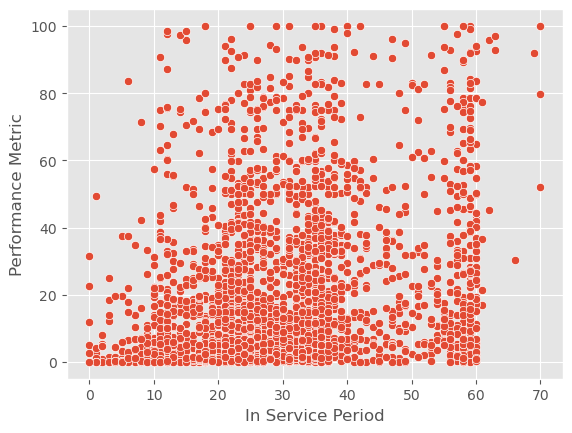

In [32]:
sns.scatterplot(data=act0_30, x="In Service Period", y="Performance Metric")

In [33]:
#get the tables
display(get_table(df=act0_30))
display(get_table(df=act31_60))
display(get_table(df=act61_100))

Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,31,36,13,21,3,12,26,23,36
f,32,13,22,47,5,11,13,40,34
g,52,31,12,22,2,13,41,12,36
i,0,1,0,0,0,2,1,0,0
k,19,22,12,9,0,1,12,3,6
m,5,9,3,2,0,0,4,2,1
n,4,1,1,1,0,0,14,0,1
o,37,3,1,3,1,5,2,1,1
q,4,0,0,0,0,0,0,0,0


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,30,37,30,118,39,20,3,11,10
f,29,27,12,38,10,23,7,10,9
g,46,29,35,20,19,6,4,9,5
i,0,5,2,1,0,0,0,0,0
k,26,21,11,10,2,4,2,1,7
m,5,15,18,17,8,3,0,2,0
n,17,2,3,23,5,5,6,2,0
o,107,44,9,19,13,17,3,1,0
q,11,3,0,12,4,5,2,3,1


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,13,13,12,120,78,17,1,9,3
f,39,33,28,28,11,10,1,5,3
g,3,4,4,10,20,23,0,1,1
i,6,2,0,11,0,6,0,0,0
k,10,19,9,49,19,20,0,8,2
m,3,2,3,40,12,5,1,1,0
n,4,1,2,15,10,7,2,0,0
o,24,1,1,14,10,13,0,0,0
q,13,0,2,12,13,2,1,0,0


In [34]:
b = pd.concat([act0_30, act31_60, act61_100])
b

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
7765,Fishing Vessel,23.0,0-36,25.0,9,80.4,61-100%,8.20,1,h
7801,Fishing Vessel,24.0,0-36,25.0,9,65.6,61-100%,14.65,0,h
9316,Product Tanker,24.0,0-36,24.0,9,80.0,61-100%,5.30,1,f
9352,Passenger/Cruise,36.0,0-36,18.0,9,70.4,61-100%,9.22,1,f


In [35]:
b[b["Product Code"].isin(target_products)]

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
3615,Fishing Vessel,24.0,0-36,51.0,9,78.8,61-100%,5.55,1,a
4713,Fishing Vessel,24.0,0-36,22.0,9,68.0,61-100%,5.39,1,a
9316,Product Tanker,24.0,0-36,24.0,9,80.0,61-100%,5.30,1,f
9352,Passenger/Cruise,36.0,0-36,18.0,9,70.4,61-100%,9.22,1,f


# product rule
a = m < n; q < n  
f = 0 > h = c > l   
g < s; s > p  
i = d (if no d, i = b) < k  

At last, for those data still missing, we use the Product Rule to extrapolate.

In [37]:
###examine if data follow the product rule
def rule_test(df, product1, product2):
    
    for route in range(1,10):
        mean1 = np.mean(df[(df["Product Code"]==product1)&(df["Route Number"]==route)]["Performance Metric"])
        mean2 = np.mean(df[(df["Product Code"]==product2)&(df["Route Number"]==route)]["Performance Metric"])
        if mean1>mean2:
            print(f"The rule between {product1} and {product2} in route {route} is violated. {product1} should have outperformed {product2}."
                 +"\n")

In [38]:
#all possible target product relationships
pairs = [["a","n"],
        ["q","n"],
        ["m","n"],
        ["c","f"],
        ["h","f"],
        ["l","f"],
        ["g","s"],
        ["p","s"],
        ["i","k"]]
len(pairs)

9

In [39]:
#test in activity group 0-30%
for i in range(9):
    rule_test(act0_30, product1=pairs[i][0], product2=pairs[i][1])

The rule between a and n in route 3 is violated. a should have outperformed n.

The rule between a and n in route 4 is violated. a should have outperformed n.

The rule between a and n in route 7 is violated. a should have outperformed n.

The rule between a and n in route 9 is violated. a should have outperformed n.

The rule between m and n in route 2 is violated. m should have outperformed n.

The rule between m and n in route 3 is violated. m should have outperformed n.

The rule between m and n in route 4 is violated. m should have outperformed n.

The rule between m and n in route 7 is violated. m should have outperformed n.

The rule between m and n in route 9 is violated. m should have outperformed n.

The rule between h and f in route 4 is violated. h should have outperformed f.

The rule between h and f in route 5 is violated. h should have outperformed f.

The rule between h and f in route 6 is violated. h should have outperformed f.

The rule between h and f in route 7 is v

In [40]:
#test in activity group 31-60%
for i in range(9):
    rule_test(act31_60, product1=pairs[i][0], product2=pairs[i][1])

The rule between a and n in route 1 is violated. a should have outperformed n.

The rule between a and n in route 3 is violated. a should have outperformed n.

The rule between a and n in route 5 is violated. a should have outperformed n.

The rule between a and n in route 6 is violated. a should have outperformed n.

The rule between a and n in route 7 is violated. a should have outperformed n.

The rule between q and n in route 1 is violated. q should have outperformed n.

The rule between q and n in route 4 is violated. q should have outperformed n.

The rule between q and n in route 5 is violated. q should have outperformed n.

The rule between q and n in route 6 is violated. q should have outperformed n.

The rule between q and n in route 7 is violated. q should have outperformed n.

The rule between m and n in route 1 is violated. m should have outperformed n.

The rule between m and n in route 3 is violated. m should have outperformed n.

The rule between m and n in route 4 is v

In [41]:
#test in activity group 61-100%
for i in range(9):
    rule_test(act61_100, product1=pairs[i][0], product2=pairs[i][1])

The rule between a and n in route 1 is violated. a should have outperformed n.

The rule between a and n in route 3 is violated. a should have outperformed n.

The rule between a and n in route 4 is violated. a should have outperformed n.

The rule between q and n in route 1 is violated. q should have outperformed n.

The rule between q and n in route 3 is violated. q should have outperformed n.

The rule between q and n in route 4 is violated. q should have outperformed n.

The rule between q and n in route 5 is violated. q should have outperformed n.

The rule between q and n in route 7 is violated. q should have outperformed n.

The rule between m and n in route 1 is violated. m should have outperformed n.

The rule between m and n in route 3 is violated. m should have outperformed n.

The rule between m and n in route 4 is violated. m should have outperformed n.

The rule between m and n in route 5 is violated. m should have outperformed n.

The rule between m and n in route 7 is v

In [42]:
#extrapolate by product

def extrap_by_product(df1, df2):
    '''
    This function take as input a dataframe and returns the extrapolated dataframe by product rules.
    Note the dataframe belongs to a specific activity group!
    '''
    #products needed 
    products = ["a", "b", "c", "d", "f", "g", "h", "i", "k", "l", "m", "n", "o", "p", "q", "r", "s"]
    df_extrap = pd.DataFrame()
    #each route, each product split out
    for i in range(1,10):
        route_fix1 = df1[df1["Route Number"]==i] #scheme group 37-60 waiting for extrapolation
        route_fix2 = df2[df2["Route Number"]==i] #scheme group 0-36 used to extrapolate
        for j in products:
            globals()[f'product_{j}_route_1'] = route_fix1[route_fix1["Product Code"]==j]
            globals()[f'product_{j}_route_2'] = route_fix2[route_fix2["Product Code"]==j]
            
        #extrapolate a
        a = product_a_route_1.copy()
        m = product_m_route_1.copy()
        n = product_n_route_1.copy()
        if len(a) < 10: #if it needs extrapolation
            m["Product Code"] = "a" #a=m
            a_extrap = pd.concat([a, m])
            if len(a_extrap) < 10: #if it still needs extrapolation
                n["Product Code"] = "a" #a<n
                a_mean = np.mean(product_a_route_2["Performance Metric"])
                n_mean = np.mean(product_n_route_2["Performance Metric"])
                mean_dif = a_mean - n_mean
                if pd.isna(mean_dif)==False: #if mean difference exists
                    n["Performance Metric"] += mean_dif 
                    a_extrap = pd.concat([a_extrap, n])   
        else:
            a_extrap = pd.DataFrame()
            
        #extrapolate f
        c = product_c_route_1.copy()
        f = product_f_route_1.copy()
        h = product_h_route_1.copy()
        l = product_l_route_1.copy()
        o = product_o_route_1.copy()
        if len(f) < 10:
            o["Product Code"] = "f" #f=o
            f_extrap = pd.concat([f, o])
            if len(f_extrap) < 10:
                #f>c
                c["Product Code"] = "f"
                c_mean = np.mean(product_c_route_2["Performance Metric"])
                f_mean = np.mean(product_f_route_2["Performance Metric"])
                mean_dif = f_mean - c_mean
                if pd.isna(mean_dif)==False:
                    c["Performance Metric"] += mean_dif
                    f_extrap = pd.concat([f_extrap, c])
                    if len(f_extrap) < 10:
                        #f>h
                        h["Product Code"] = "f"
                        h_mean = np.mean(product_h_route_2["Performance Metric"])
                        f_mean = np.mean(product_f_route_2["Performance Metric"])
                        mean_dif = f_mean - h_mean
                        if pd.isna(mean_dif)==False:
                            h["Performance Metric"] += mean_dif
                            f_extrap = pd.concat([f_extrap, h])
                            if len(f_extrap) < 10:
                                #f>l
                                l["Product Code"] = "f"
                                l_mean = np.mean(product_l_route_2["Performance Metric"])
                                f_mean = np.mean(product_f_route_2["Performance Metric"])
                                mean_dif = f_mean - l_mean
                                if pd.isna(mean_dif)==False:
                                    l["Performance Metric"] += mean_dif
                                    f_extrap = pd.concat([f_extrap, l])
        else:
            f_extrap = pd.DataFrame()
                    
        #extrapolate g
        g = product_g_route_1.copy()
        s = product_s_route_1.copy()
        if len(g) < 10:
            #g<s
            s["Product Code"] = "g" 
            s_mean = np.mean(product_s_route_2["Performance Metric"])
            g_mean = np.mean(product_g_route_2["Performance Metric"])
            mean_dif = g_mean - s_mean
            g_extrap = pd.DataFrame()
            if pd.isna(mean_dif)==False:
                s["Performance Metric"] += mean_dif
                g_extrap = pd.concat([g, s])
        else:
            g_extrap = pd.DataFrame()
        
        #extrapolate i
        b = product_b_route_1.copy()
        d = product_d_route_1.copy()
        i = product_i_route_1.copy()
        k = product_k_route_1.copy()
        if len(i) < 10:
            if len(d) > 0:
                d["Product Code"] = "i"  #i=d 
                i_extrap = pd.concat([i, d])
                if len(i_extrap) < 10:
                    k["Product Code"] = "i" #i<k
                    k_mean = np.mean(product_k_route_2["Performance Metric"])
                    i_mean = np.mean(product_i_route_2["Performance Metric"])
                    mean_dif = i_mean - k_mean
                    if pd.isna(mean_dif)==False:
                        k["Performance Metric"] += mean_dif
                        i_extrap = pd.concat([i_extrap, k])
            else: #if there's no data for product D
                b["Product Code"] = "i"  #i=b other way 
                i_extrap = pd.concat([i, b])
                if len(i_extrap) < 10:
                    k["Product Code"] = "i" #i<k
                    k_mean = np.mean(product_k_route_2["Performance Metric"])
                    i_mean = np.mean(product_i_route_2["Performance Metric"])
                    mean_dif = i_mean - k_mean
                    if pd.isna(mean_dif)==False:
                        k["Performance Metric"] += mean_dif
                        i_extrap = pd.concat([i_extrap, k])
        else:
            i_extrap = pd.DataFrame()
                
        #extrapolate k
        i = product_i_route_1.copy()
        k = product_k_route_1.copy()
        if len(k) < 10:
            i["Product Code"] = "k" #k>i
            i_mean = np.mean(product_i_route_2["Performance Metric"])
            k_mean = np.mean(product_k_route_2["Performance Metric"])
            mean_dif = k_mean - i_mean
            k_extrap = pd.DataFrame()
            if pd.isna(mean_dif)==False:
                i["Performance Metric"] += mean_dif
                k_extrap = pd.concat([k, i])
                if len(k_extrap) <10:
                    d["Product Code"] = "k" #k>d
                    d_mean = np.mean(product_d_route_2["Performance Metric"])
                    k_mean = np.mean(product_k_route_2["Performance Metric"])
                    mean_dif = k_mean - d_mean
                    if pd.isna(mean_dif)==False:
                        d["Performance Metric"] += mean_dif
                        k_extrap = pd.concat([k_extrap, d])
        else:
            k_extrap = pd.DataFrame()
        
        #extrapolate m
        a = product_a_route_1.copy()
        m = product_m_route_1.copy()
        n = product_n_route_1.copy()
        if len(m) < 10:
            a["Product Code"] = "m" #m=a
            m_extrap = pd.concat([m, a])
            if len(m_extrap) < 10:
                n["Product Code"] = "m" #m<n
                n_mean = np.mean(product_n_route_2["Performance Metric"])
                m_mean = np.mean(product_m_route_2["Performance Metric"])
                mean_dif = m_mean - n_mean
                if pd.isna(mean_dif)==False:
                    n["Performance Metric"] += mean_dif
                    m_extrap = pd.concat([m_extrap, n])
        else:
            m_extrap = pd.DataFrame()
            
        #extrapolate n
        a = product_a_route_1.copy()
        m = product_m_route_1.copy()
        n = product_n_route_1.copy()
        if len(n) < 10:
            a["Product Code"] = "n" #n>a
            a_mean = np.mean(product_a_route_2["Performance Metric"])
            n_mean = np.mean(product_n_route_2["Performance Metric"])
            mean_dif = n_mean - a_mean
            n_extrap = pd.DataFrame()
            if pd.isna(mean_dif)==False:
                a["Performance Metric"] += mean_dif
                n_extrap = pd.concat([n, a])
                if len(n_extrap) < 10:
                    m["Product Code"] = "n" #n>m
                    m_mean = np.mean(product_m_route_2["Performance Metric"])
                    n_mean = np.mean(product_n_route_2["Performance Metric"])
                    mean_dif = n_mean - m_mean
                    if pd.isna(mean_dif)==False:
                        m["Performance Metric"] += mean_dif
                        n_extrap = pd.concat([n_extrap, m])
                        if len(n_extrap) <10:
                            q["Product Code"] = "n" #n>q
                            q_mean = np.mean(product_q_route_2["Performance Metric"])
                            n_mean = np.mean(product_n_route_2["Performance Metric"])
                            mean_dif = n_mean - q_mean
                            if pd.isna(mean_dif)==False:
                                q["Performance Metric"] += mean_dif
                                n_extrap = pd.concat([n_extrap, q])
        else:
            n_extrap = pd.DataFrame()
            
        #extrapolate o 
        c = product_c_route_1.copy()
        f = product_f_route_1.copy()
        h = product_h_route_1.copy()
        l = product_l_route_1.copy()
        o = product_o_route_1.copy()
        if len(o) < 10:
            f["Product Code"] = "o" #o=f
            o_extrap = pd.concat([o, f])
            if len(o_extrap) < 10:
                c["Product Code"] = "o"#o>c
                c_mean = np.mean(product_c_route_2["Performance Metric"])
                o_mean = np.mean(product_o_route_2["Performance Metric"])
                mean_dif = o_mean - c_mean
                if pd.isna(mean_dif)==False:
                    c["Performance Metric"] += mean_dif
                    o_extrap = pd.concat([o_extrap, c])
                    if len(f_extrap) < 10:
                        h["Product Code"] = "o" #o>h
                        h_mean = np.mean(product_h_route_2["Performance Metric"])
                        o_mean = np.mean(product_o_route_2["Performance Metric"])
                        mean_dif = o_mean - h_mean
                        if pd.isna(mean_dif)==False:
                            h["Performance Metric"] += mean_dif
                            o_extrap = pd.concat([o_extrap, h])
                            if len(f_extrap) < 10:
                                l["Product Code"] = "o" #o>l
                                l_mean = np.mean(product_l_route_2["Performance Metric"])
                                o_mean = np.mean(product_o_route_2["Performance Metric"])
                                mean_dif = o_mean - l_mean
                                if pd.isna(mean_dif)==False:
                                    l["Performance Metric"] += mean_dif
                                    o_extrap = pd.concat([o_extrap, l])
        else:
            o_extrap = pd.DataFrame()
                    
        #extrapolate q
        n = product_n_route_1.copy()
        q = product_q_route_1.copy()
        if len(q) < 10:
            n["Product Code"] = "q" #q<n
            n_mean = np.mean(product_n_route_2["Performance Metric"])
            q_mean = np.mean(product_q_route_2["Performance Metric"])
            mean_dif = q_mean - n_mean
            q_extrap = pd.DataFrame()
            if pd.isna(mean_dif)==False:
                n["Performance Metric"] += mean_dif
                q_extrap = pd.concat([q, n])
        else:
            q_extrap = pd.DataFrame()
        
        #extrapolate s
        g = product_g_route_1.copy()
        p = product_p_route_1.copy()
        s = product_s_route_1.copy()
        if len(s) < 10:
            g["Product Code"] = "s" #s>g
            g_mean = np.mean(product_g_route_2["Performance Metric"])
            s_mean = np.mean(product_s_route_2["Performance Metric"])
            mean_dif = s_mean - g_mean
            s_extrap = pd.DataFrame()
            if pd.isna(mean_dif)==False:
                g["Performance Metric"] += mean_dif
                s_extrap = pd.concat([s, g])
                if len(s_extrap) < 10:
                    p["Product Code"] = "q" #s>p
                    p_mean = np.mean(product_l_route_2["Performance Metric"])
                    s_mean = np.mean(product_o_route_2["Performance Metric"])
                    mean_dif = s_mean - p_mean
                    if pd.isna(mean_dif)==False:
                        p["Performance Metric"] += mean_dif
                        s_extrap = pd.concat([s_extrap, p])
        else:
            s_extrap = pd.DataFrame()
        
        df_product = pd.concat([a_extrap, f_extrap, g_extrap, i_extrap, k_extrap, 
                                m_extrap, n_extrap, o_extrap, q_extrap, s_extrap])
        df_extrap = pd.concat([df_extrap, df_product])
        
    #some data's performance metric beyond the range0-100, we need to fix it manually
    df_extrap.loc[df_extrap["Performance Metric"]<0, ["Performance Metric"]] = 0
    df_extrap.loc[df_extrap["Performance Metric"]>100, ["Performance Metric"]] = 100
    return df_extrap

$Notice!$ We cannot extrapolate any data for product "R" by the rules since there's no rule for that product.

In [43]:
act0_30_extrap = pd.concat([act0_30, extrap_by_product(df1=act0_30, df2=act0_30_2)])
act0_30_extrap

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
10986,Offshore Vessel,24.0,0-36,23.0,9,9.0,0-30%,4.16,1,o
11111,Offshore Vessel,36.0,0-36,22.0,9,2.0,0-30%,3.39,1,o
11157,Offshore Tug/Supply Ship,24.0,0-36,59.0,9,9.0,0-30%,46.36,0,o
11171,Offshore Vessel,36.0,0-36,57.0,9,14.0,0-30%,28.86,0,o


In [44]:
act31_60_extrap = pd.concat([act31_60, extrap_by_product(df1=act31_60, df2=act31_60_2)])
act31_60_extrap

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
9242,Offshore Vessel,60.0,37-60,59.0,9,8.0,0-30%,2.25,1,f
10824,Offshore Vessel,60.0,37-60,23.0,9,15.0,0-30%,8.43,1,f
6073,General Cargo Ship,41.0,37-60,36.0,1,29.0,0-30%,3.75,1,l
5599,Container,60.0,37-60,13.0,7,23.0,0-30%,7.50,1,t
5596,Container,60.0,37-60,13.0,7,23.0,0-30%,6.30,1,p
...,...,...,...,...,...,...,...,...,...,...
10207,Product Tanker,36.0,0-36,36.0,9,33.0,31-60%,41.55,0,o
10350,Crew/Supply Vessel,36.0,0-36,18.0,9,31.4,31-60%,1.00,1,o
10723,Product Tanker,24.0,0-36,35.0,9,46.0,31-60%,2.97,1,o
11110,Anchor Handling Tug Supply,36.0,0-36,36.0,9,35.6,31-60%,3.39,1,o


In [45]:
act61_100_extrap = pd.concat([act61_100, extrap_by_product(df1=act61_100, df2=act61_100_2)])
act61_100_extrap

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
10280,Bulk Carrier,60.0,37-60,49.0,8,38.8,31-60%,4.85,1,f
10289,Container,60.0,37-60,59.0,8,48.0,31-60%,2.03,1,f
10758,Product Tanker,60.0,37-60,52.0,8,52.0,31-60%,5.85,1,f
10888,Bulk Carrier,60.0,37-60,51.0,8,37.2,31-60%,4.30,1,f
11091,Chemical Tanker,60.0,37-60,17.0,6,52.0,31-60%,1.70,1,f
...,...,...,...,...,...,...,...,...,...,...
3615,Fishing Vessel,24.0,0-36,51.0,9,78.8,61-100%,5.55,1,m
4713,Fishing Vessel,24.0,0-36,22.0,9,68.0,61-100%,5.39,1,m
9316,Product Tanker,24.0,0-36,24.0,9,80.0,61-100%,5.30,1,o
9352,Passenger/Cruise,36.0,0-36,18.0,9,70.4,61-100%,9.22,1,o


In [46]:
##total population for scheme group 37-60
scheme37_60_extrap = pd.concat([act0_30_extrap, act31_60_extrap, act61_100_extrap])
scheme37_60_extrap

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
3615,Fishing Vessel,24.0,0-36,51.0,9,78.8,61-100%,5.55,1,m
4713,Fishing Vessel,24.0,0-36,22.0,9,68.0,61-100%,5.39,1,m
9316,Product Tanker,24.0,0-36,24.0,9,80.0,61-100%,5.30,1,o
9352,Passenger/Cruise,36.0,0-36,18.0,9,70.4,61-100%,9.22,1,o


In [49]:
## how many observations for target products in total
final_target = scheme37_60_extrap[scheme37_60_extrap["Product Code"].isin(target_products)]
final_target

,Vessel Group,Scheme,Scheme Group,In Service Period,Route Number,% Activity,Activity Group,Performance Metric,Pass/Fail,Product Code
108,Products Tanker,59.0,37-60,56.0,1,14.5,0-30%,45.11,0,o
138,Bulk Carrier,59.0,37-60,31.0,2,4.1,0-30%,53.98,0,o
154,Offshore Vessel,60.0,37-60,39.0,1,15.0,0-30%,72.18,0,o
176,Anchor Handling Tug Supply,60.0,37-60,28.0,1,28.5,0-30%,1.20,1,o
200,Tug,60.0,37-60,58.0,8,3.0,0-30%,11.82,0,o
...,...,...,...,...,...,...,...,...,...,...
3615,Fishing Vessel,24.0,0-36,51.0,9,78.8,61-100%,5.55,1,m
4713,Fishing Vessel,24.0,0-36,22.0,9,68.0,61-100%,5.39,1,m
9316,Product Tanker,24.0,0-36,24.0,9,80.0,61-100%,5.30,1,o
9352,Passenger/Cruise,36.0,0-36,18.0,9,70.4,61-100%,9.22,1,o


In [48]:
act_group = [act0_30_extrap, act31_60_extrap, act61_100_extrap]
#dervie the table of numbers after extrapolation by product
for i, group in enumerate(act_group):
    print(groups[i], "after extrapolation by the product rule")
    display(get_table(df=group))
    print("\n\n\n")

Activity Group 0-30% after extrapolation by the product rule


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,31,36,13,21,6,12,26,23,36
f,32,13,22,47,19,11,13,40,34
g,52,31,12,22,2,13,41,12,36
i,11,13,17,9,2,6,8,9,38
k,19,22,12,9,0,4,12,3,6
m,41,54,19,25,3,12,34,27,38
n,39,38,1,23,0,0,14,0,38
o,37,19,24,53,8,21,17,42,36
q,12,0,0,0,0,0,0,0,0






Activity Group 31-60% after extrapolation by the product rule


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,30,37,30,118,39,20,12,11,10
f,29,27,12,38,10,23,17,10,18
g,46,29,35,20,19,6,4,9,5
i,13,25,17,21,10,2,1,8,5
k,26,21,11,10,2,4,2,1,7
m,40,15,18,17,55,26,3,15,10
n,17,41,36,23,49,30,15,15,0
o,107,44,30,19,13,17,13,12,9
q,11,8,0,12,13,15,10,8,1






Activity Group 61-100% after extrapolation by the product rule


Routes,1,2,3,4,5,6,7,8,9
Products,,,,,,,,,
a,13,13,12,120,78,17,3,19,6
f,39,33,28,28,11,10,2,16,6
g,9,4,4,10,20,23,0,1,1
i,28,17,22,11,33,17,1,6,2
k,10,19,9,49,19,20,0,8,2
m,19,17,18,40,12,27,5,11,3
n,21,15,16,15,10,31,2,0,0
o,24,35,30,14,10,13,1,5,3
q,14,0,6,12,13,11,4,0,0


In [106]:
# aggregate the data for each product, on each route, for activity range 0-30.
# give the pass rate overall
pr0_30 = pd.DataFrame(np.zeros((len(target_products),1)), index=target_products, columns=["Pass rate (%)"])
for i, product in enumerate(target_products):
    num_pass = len(act0_30_extrap[(act0_30_extrap["Performance Metric"] <= 10)&(act0_30_extrap["Product Code"]==product)])
    num_fail = len(act0_30_extrap[(act0_30_extrap["Performance Metric"] > 10)&(act0_30_extrap["Product Code"]==product)])
    pr0_30.iloc[i, ] = round(100*num_pass/(num_pass+num_fail),2)

pr0_30.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%)
n,58.82
i,52.21
q,50.00
a,49.02
m,44.66
k,42.53
g,39.37
r,34.22
f,33.77
o,30.74


In [101]:
# aggregate the data for each product, on each route, for activity range 31-60.
# give the pass rate overall
pr31_60 = pd.DataFrame(np.zeros((len(target_products),1)), index=target_products, columns=["Pass rate (%)"])
for i, product in enumerate(target_products):
    num_pass = len(act31_60_extrap[(act31_60_extrap["Performance Metric"] <= 10)&(act31_60_extrap["Product Code"]==product)])
    num_fail = len(act31_60_extrap[(act31_60_extrap["Performance Metric"] > 10)&(act31_60_extrap["Product Code"]==product)])
    pr31_60.iloc[i, ] = round(100*num_pass/(num_pass+num_fail),2)

pr31_60.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%)
s,77.42
k,67.86
i,62.75
m,56.78
a,55.70
n,53.98
g,51.45
f,48.37
r,40.12
o,35.61


In [100]:
# aggregate the data for each product, on each route, for activity range 61-100.
# give the pass rate overall
pr61_100 = pd.DataFrame(np.zeros((len(target_products),1)), index=target_products, columns=["Pass rate (%)"])
for i, product in enumerate(target_products):
    num_pass = len(act61_100_extrap[(act61_100_extrap["Performance Metric"] <= 10)&(act61_100_extrap["Product Code"]==product)])
    num_fail = len(act61_100_extrap[(act61_100_extrap["Performance Metric"] > 10)&(act61_100_extrap["Product Code"]==product)])
    pr61_100.iloc[i, ] = round(100*num_pass/(num_pass+num_fail),2)

pr61_100.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%)
a,71.89
m,68.42
k,64.71
n,62.73
f,61.27
q,60.00
o,54.81
i,54.74
s,51.85
g,37.50


In [72]:
#Confidence Interval

def deg_conf(df, product, alpha=0.05):
    '''
    The function takes as input a dataframe, a type of product and a route and a confidence level: alpha. 
    Return the confidence interval of the mean for that specific type of product aggregated on all routes.
    '''
    
    N = len(scheme37_60_extrap[scheme37_60_extrap["Product Code"]==product]) #number of population 
    subdata = df[df["Product Code"]==product] #target dataset
    pm = subdata["Performance Metric"] #performance metric
    mu = np.mean(pm) #mean 
    sigma = np.std(pm) #sigma
    z = norm.ppf(1 - alpha/2) # 1-alpha/2 critical value
    n = len(subdata) #number of subset
    if n==0:
        return None
    else:
        B = np.sqrt((N-n)/n/(N-1)) * z * sigma #bound
        CI = "["+str(round(mu-B,2))+", "+str(round(mu+B,2))+"]" #Confidence Interval
        return CI

In [112]:
#get the confidence interval along with the pass rate for activity group 0-30
ci_table0_30 = pd.DataFrame(columns=["Pass rate (%)", "CI"], index=target_products)
ci_table0_30["Pass rate (%)"] = pr0_30["Pass rate (%)"]
for i, product in enumerate(target_products):
    
    ci_table0_30.CI[i] = deg_conf(df=act0_30_extrap, product=product)


ci_table0_30.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%),CI
n,58.82,"[12.32, 17.82]"
i,52.21,"[13.54, 19.46]"
q,50.00,"[11.71, 33.15]"
a,49.02,"[16.71, 22.13]"
m,44.66,"[19.15, 23.74]"
k,42.53,"[16.38, 24.57]"
g,39.37,"[22.25, 27.12]"
r,34.22,"[21.6, 26.79]"
f,33.77,"[22.53, 27.16]"
o,30.74,"[24.2, 28.57]"


In [127]:
#those pr >= 75
display(ci_table0_30[ci_table0_30["Pass rate (%)"]>=75])
#those pr 60-74
display(ci_table0_30[(ci_table0_30["Pass rate (%)"]<75)&(ci_table0_30["Pass rate (%)"]>=60)])
#those pr50-59
display(ci_table0_30[(ci_table0_30["Pass rate (%)"]<59)&(ci_table0_30["Pass rate (%)"]>=50)])
#those pr<50
display(ci_table0_30[ci_table0_30["Pass rate (%)"]<50])

,Pass rate (%),CI


,Pass rate (%),CI


,Pass rate (%),CI
i,52.21,"[13.54, 19.46]"
n,58.82,"[12.32, 17.82]"
q,50.00,"[11.71, 33.15]"


,Pass rate (%),CI
a,49.02,"[16.71, 22.13]"
f,33.77,"[22.53, 27.16]"
g,39.37,"[22.25, 27.12]"
k,42.53,"[16.38, 24.57]"
m,44.66,"[19.15, 23.74]"
o,30.74,"[24.2, 28.57]"
r,34.22,"[21.6, 26.79]"
s,12.84,"[31.3, 38.02]"


In [115]:
#for activity group 31-60
ci_table31_60 = pd.DataFrame(columns=["Pass rate (%)", "CI"], index=target_products)
ci_table31_60["Pass rate (%)"] = pr31_60["Pass rate (%)"]
for i, product in enumerate(target_products):
    
    ci_table31_60.CI[i] = deg_conf(df=act31_60_extrap, product=product)


ci_table31_60.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%),CI
s,77.42,"[3.45, 10.81]"
k,67.86,"[7.67, 10.22]"
i,62.75,"[8.82, 12.8]"
m,56.78,"[11.87, 15.32]"
a,55.70,"[11.42, 13.7]"
n,53.98,"[11.84, 15.04]"
g,51.45,"[12.12, 15.53]"
f,48.37,"[12.55, 16.04]"
r,40.12,"[17.68, 20.45]"
o,35.61,"[17.81, 21.15]"


In [128]:
#those pr >= 75
display(ci_table31_60[ci_table31_60["Pass rate (%)"]>=75])
#those pr 60-74
display(ci_table31_60[(ci_table31_60["Pass rate (%)"]<75)&(ci_table31_60["Pass rate (%)"]>=60)])
#those pr50-59
display(ci_table31_60[(ci_table31_60["Pass rate (%)"]<59)&(ci_table31_60["Pass rate (%)"]>=50)])
#those pr<50
display(ci_table31_60[ci_table31_60["Pass rate (%)"]<50])

,Pass rate (%),CI
s,77.42,"[3.45, 10.81]"


,Pass rate (%),CI
i,62.75,"[8.82, 12.8]"
k,67.86,"[7.67, 10.22]"


,Pass rate (%),CI
a,55.70,"[11.42, 13.7]"
g,51.45,"[12.12, 15.53]"
m,56.78,"[11.87, 15.32]"
n,53.98,"[11.84, 15.04]"


,Pass rate (%),CI
f,48.37,"[12.55, 16.04]"
o,35.61,"[17.81, 21.15]"
q,29.49,"[15.42, 19.57]"
r,40.12,"[17.68, 20.45]"


In [116]:
#for activity group 61-100
ci_table61_100 = pd.DataFrame(columns=["Pass rate (%)", "CI"], index=target_products)
ci_table61_100["Pass rate (%)"] = pr61_100["Pass rate (%)"]
for i, product in enumerate(target_products):
    
    ci_table61_100.CI[i] = deg_conf(df=act61_100_extrap, product=product)


ci_table61_100.sort_values(by="Pass rate (%)", ascending=False)

,Pass rate (%),CI
a,71.89,"[7.25, 8.46]"
m,68.42,"[8.01, 10.23]"
k,64.71,"[8.52, 10.83]"
n,62.73,"[7.8, 10.82]"
f,61.27,"[9.46, 11.69]"
q,60.00,"[8.64, 11.93]"
o,54.81,"[10.89, 14.61]"
i,54.74,"[9.26, 11.43]"
s,51.85,"[8.94, 11.78]"
g,37.50,"[11.56, 15.32]"


In [129]:
#those pr >= 75
display(ci_table61_100[ci_table61_100["Pass rate (%)"]>=75])
#those pr 60-74
display(ci_table61_100[(ci_table61_100["Pass rate (%)"]<75)&(ci_table61_100["Pass rate (%)"]>=60)])
#those pr50-59
display(ci_table61_100[(ci_table61_100["Pass rate (%)"]<59)&(ci_table61_100["Pass rate (%)"]>=50)])
#those pr<50
display(ci_table61_100[ci_table61_100["Pass rate (%)"]<50])

,Pass rate (%),CI


,Pass rate (%),CI
a,71.89,"[7.25, 8.46]"
f,61.27,"[9.46, 11.69]"
k,64.71,"[8.52, 10.83]"
m,68.42,"[8.01, 10.23]"
n,62.73,"[7.8, 10.82]"
q,60.00,"[8.64, 11.93]"


,Pass rate (%),CI
i,54.74,"[9.26, 11.43]"
o,54.81,"[10.89, 14.61]"
s,51.85,"[8.94, 11.78]"


,Pass rate (%),CI
g,37.50,"[11.56, 15.32]"
r,31.45,"[16.77, 22.8]"
